<a href="https://colab.research.google.com/github/KaziSafir/Diabetes-Data-Analysis/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#a) Paste the code from config_block and also the rest of the codes in consecutive shells.
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

import pandas as pd
import numpy as np
import seaborn as sns

#c) Import appropriate libraries of python for creating plots and graphs
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

#h) from pyspark import appropriate libraries for k-means, vector assembler, and standard scaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

openjdk-8-jdk-headless is already the newest version (8u392-ga-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
#d) Read the code and print the schema of the diabetes data
df =spark.read.format("csv").option("header","true").load("diabetes-2.csv")
df.show(8)
df.printSchema()


+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+----+----+----+----+----+----+----+----+----+----+----+----+----+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|         

In [ ]:
#convert each columns to float
df = df.withColumn("Pregnancies", df["Pregnancies"].cast(FloatType()))
df = df.withColumn("Glucose", df["Glucose"].cast(FloatType()))
df = df.withColumn("BloodPressure", df["BloodPressure"].cast(FloatType()))
df = df.withColumn("SkinThickness", df["SkinThickness"].cast(FloatType()))
df = df.withColumn("Insulin", df["Insulin"].cast(FloatType()))
df = df.withColumn("BMI", df["BMI"].cast(FloatType()))
df = df.withColumn("DiabetesPedigreeFunction", df["DiabetesPedigreeFunction"].cast(FloatType()))
df = df.withColumn("Age", df["Age"].cast(FloatType()))
df = df.withColumn("Outcome", df["Outcome"].cast(FloatType()))

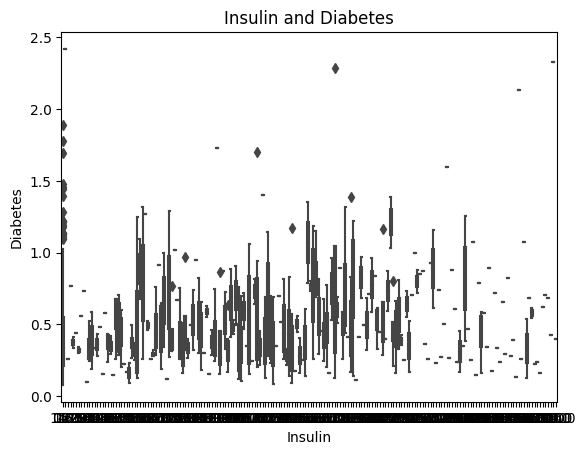

In [ ]:
#e) Create box plot by taking Insulin as the x-axis and diabetes as y-axis
sns.boxplot(x='Insulin', y='DiabetesPedigreeFunction', data=df.toPandas())
#f) Show the label titles and the main title of your choice
plt.xlabel("Insulin")
plt.ylabel("Diabetes")
plt.title("Insulin and Diabetes")
plt.show()


<ipython-input-5-4450cf1c9383>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.toPandas().corr()


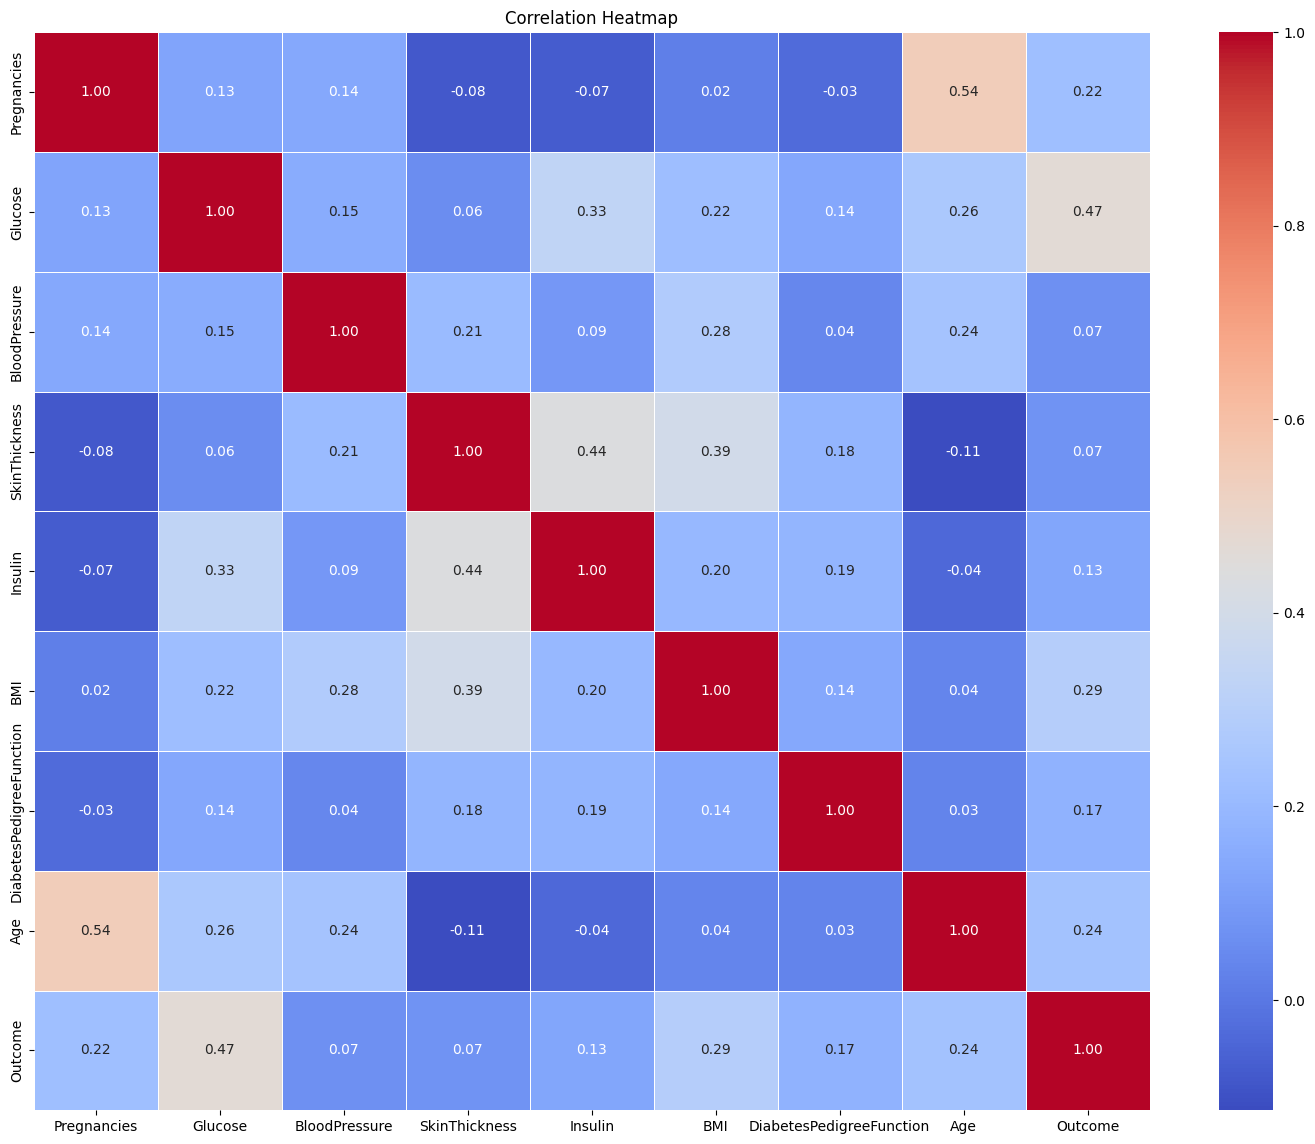

In [ ]:
#g) create the heatmap of the entire diabetes data
correlation_matrix = df.toPandas().corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#i) Create k-means by using the features glucose, blood pressure, insulin and BMI
df = spark.read.csv("diabetes-2.csv", header=True, inferSchema=True)
#select features glucose, blood pressure, insulin and BMI
selected_features = ["Glucose", "BloodPressure", "Insulin", "BMI"]
feature_assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
df = feature_assembler.transform(df)
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(df)
scaled_data = scaler_model.transform(df)
kmeans = KMeans().setK(3)
kmeans = kmeans.setSeed(1)
kmeans_model = kmeans.fit(scaled_data)
clustered_data = kmeans_model.transform(scaled_data)

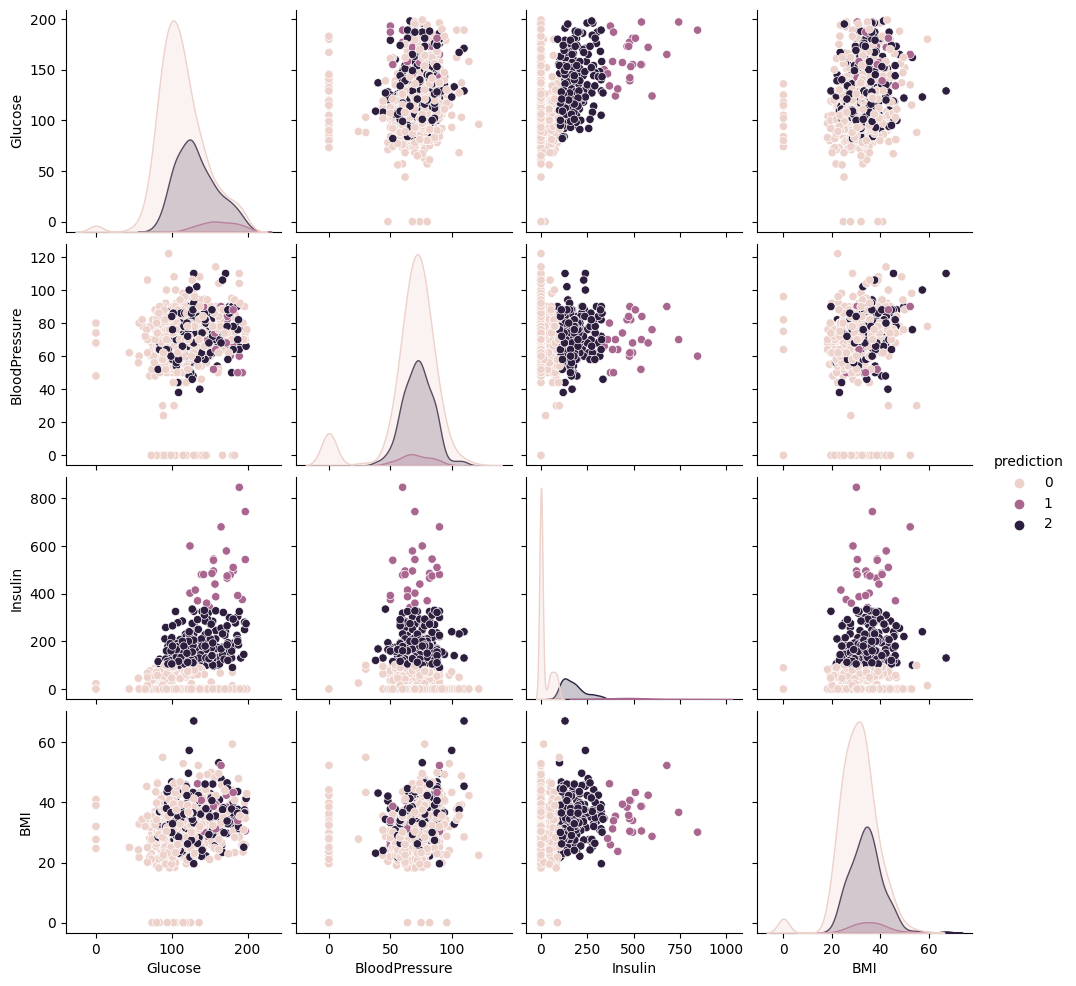

In [ ]:
#j) By using pairplot features of seaborn, plot k-means
clustered_df = clustered_data.select("prediction", *selected_features).toPandas()
sns.pairplot(clustered_df, hue="prediction")
plt.show()